In [1]:
import pandas as pd
import os
import re

bac_path = r'P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx/2024'
df_list = []

for month in range(1, 13):
    folder_path = os.path.join(bac_path, f'{month:02d}')
    
    if not os.path.exists(folder_path):
        print(f'❌ Bỏ qua: Thư mục không tồn tại {folder_path}')
        continue

    for file in os.listdir(folder_path):
        if file.endswith('.xlsx'):
            date_match = re.search(r'(\d{4}\.\d{2}\.\d{2})', file)
            date_part = date_match.group(1) if date_match else ""
            file_path = os.path.join(folder_path, file)

            try:
                if '-A1' in file:
                    df = pd.read_excel(file_path, skiprows=162, usecols='A:BC', nrows=860)
                elif '-NPC' in file:
                    df = pd.read_excel(file_path, skiprows=92, usecols='A:BC', nrows=726)
                else:
                    continue

                df.insert(7, 'Ngày', date_part)
                df_list.append(df)

            except Exception as e:
                print(f"⚠️ Lỗi khi đọc file {file_path}: {e}")

# Gộp tất cả lại
df_bac = pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx/2024\01
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx/2024\02
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx/2024\03


KeyboardInterrupt: 

In [1]:
import pandas as pd
import os
import re

root_path = r'P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx'
df_list = []

# Duyệt qua từng năm (thư mục con trong thư mục gốc)
for year in os.listdir(root_path):
    year_path = os.path.join(root_path, year)
    if not os.path.isdir(year_path):
        continue  # bỏ qua nếu không phải thư mục
    
    for month in range(1, 13):
        folder_path = os.path.join(year_path, f'{month:02d}')
        
        if not os.path.exists(folder_path):
            print(f'❌ Bỏ qua: Thư mục không tồn tại {folder_path}')
            continue

        for file in os.listdir(folder_path):
            if file.endswith('.xlsx'):
                # Tìm ngày trong tên file
                date_match = re.search(r'(\d{4}\.\d{2}\.\d{2})', file)
                date_part = date_match.group(1) if date_match else ""

                file_path = os.path.join(folder_path, file)

                try:
                    if '-A1' in file:
                        df = pd.read_excel(file_path, skiprows=162, usecols='A:BC', nrows=860)
                    elif '-NPC' in file:
                        df = pd.read_excel(file_path, skiprows=92, usecols='A:BC', nrows=726)
                    else:
                        continue

                    df.insert(7, 'Ngày', date_part)
                    df.insert(8, 'Năm', year)
                    df_list.append(df)

                except Exception as e:
                    print(f"⚠️ Lỗi khi đọc file {file_path}: {e}")

# Gộp tất cả lại
df_bac = pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()
print(f'✅ Đã gộp xong {len(df_bac)} dòng dữ liệu từ các năm.')


❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2024\01
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2024\02
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2024\03
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\04
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\05
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\06
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\07
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\08
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\09
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\10
❌ Bỏ qua: Thư mục không tồn tại P:/15. Hệ thống DGMS/Daily Report/Bac/BCSVH_xlsx\2025\11
❌ Bỏ qua: Thư mục khô

In [2]:
df_bac = df_bac[df_bac['Loại'] == 'Báo cáo sau vận hành']
df_bac.drop(columns=['Loại', 'Trạng thái'], inplace=True)
df_bac.reset_index(drop=True, inplace=True)
df_bac

,Code,Nhà máy,P.Đặt,Q.ĐK,Điện lực,Ngày,Năm,00:30,01:00,01:30,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,A16.10,Bản Rạ,18.6,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A16.11,Bảo Lâm 1,30.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A16.14,Bảo Lâm 3A,8.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A16.15,Hòa Thuận,17.4,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A16.16,Mông Ân,30.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100511,A12.13,Khao Mang,30.0,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,A12.14,Khao Mang Thượng,24.5,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,A12.18,Thác Cá 2,14.5,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100514,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Chỉ giữ lại dữ liệu đến cột "00:00"
df_bac = df_bac.loc[:, :'00:00']
df_bac

,Code,Nhà máy,P.Đặt,Q.ĐK,Điện lực,Ngày,Năm,00:30,01:00,01:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
0,A16.10,Bản Rạ,18.6,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A16.11,Bảo Lâm 1,30.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,19.6,11.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A16.14,Bảo Lâm 3A,8.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A16.15,Hòa Thuận,17.4,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,9.8,10.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A16.16,Mông Ân,30.0,A1,PC_CAOBANG,2024.04.18,2024,0.0,0.0,0.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100511,A12.13,Khao Mang,30.0,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,28.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100512,A12.14,Khao Mang Thượng,24.5,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,24.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100513,A12.18,Thác Cá 2,14.5,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100514,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.03.01,2025,0.0,0.0,0.0,...,21.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Đầu tiên, tạo một bản sao để không ảnh hưởng đến dữ liệu gốc
df_melted = pd.melt(
    df_bac,
    id_vars=['Code', 'Nhà máy', 'P.Đặt', 'Q.ĐK', 'Điện lực', 'Ngày', 'Năm'],
    value_vars=['00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30', '04:00', 
                '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30', '08:00', 
                '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30', '12:00', 
                '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', 
                '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', 
                '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '00:00'],
    var_name='Giờ',
    value_name='CS'
)

# Tạo cột datetime từ thông tin Năm, Ngày và Giờ
# Lưu ý: Nếu '00:00' thuộc về ngày tiếp theo, cần xử lý đặc biệt
def create_datetime(row):
    year = row['Năm']
    date = row['Ngày']
    time = row['Giờ']
    # Kết hợp lại thành chuỗi ngày giờ đúng định dạng
    dt_str = f"{year}.{date.split('.', 1)[1]} {time}" if '.' in date else f"{year}.{date} {time}"
    # Định dạng đúng là "%Y.%m.%d %H:%M"
    dt = pd.to_datetime(dt_str, format="%Y.%m.%d %H:%M")
    # Nếu là '00:00', cộng thêm 1 ngày
    if time == '00:00':
        dt = dt + pd.Timedelta(days=1)
    return dt

# Tạo cột TIME
df_melted['TIME'] = df_melted.apply(create_datetime, axis=1)

# Sắp xếp theo Code, Nhà máy, và TIME
df_result = df_melted.sort_values(by=['Code', 'Nhà máy', 'TIME'])

# Loại bỏ các cột không cần thiết nữa
df_result = df_result.drop(['Ngày', 'Năm', 'Giờ'], axis=1)

# Để đảm bảo cột TIME nằm ở vị trí hợp lý, có thể sắp xếp lại thứ tự các cột
df_result = df_result[['Code', 'Nhà máy', 'P.Đặt', 'Q.ĐK', 'Điện lực', 'TIME', 'CS']]

# Reset index
df_result = df_result.reset_index(drop=True)

In [ ]:
df_result

,Code,Nhà máy,P.Đặt,Q.ĐK,Điện lực,TIME,CS
0,A12.10,Hồ Bốn,18.0,A1,PC_YENBAI,2024-04-18 00:30:00,0.0
1,A12.10,Hồ Bốn,18.0,A1,PC_YENBAI,2024-04-18 01:00:00,0.0
2,A12.10,Hồ Bốn,18.0,A1,PC_YENBAI,2024-04-18 01:30:00,0.0
3,A12.10,Hồ Bốn,18.0,A1,PC_YENBAI,2024-04-18 02:00:00,0.0
4,A12.10,Hồ Bốn,18.0,A1,PC_YENBAI,2024-04-18 02:30:00,0.0
...,...,...,...,...,...,...,...
4824763,NaN,Đồng Chum,9.0,PC_HOABINH,PC_HOABINH,2025-02-28 22:00:00,0.0
4824764,NaN,Đồng Chum,9.0,PC_HOABINH,PC_HOABINH,2025-02-28 22:30:00,0.0
4824765,NaN,Đồng Chum,9.0,PC_HOABINH,PC_HOABINH,2025-02-28 23:00:00,0.0
4824766,NaN,Đồng Chum,9.0,PC_HOABINH,PC_HOABINH,2025-02-28 23:30:00,0.0


In [ ]:
df_result_sorted = df_result.sort_values(by=['Điện lực', 'Nhà máy', 'TIME']).reset_index(drop=True)
df_result_sorted

,Code,Nhà máy,P.Đặt,Q.ĐK,Điện lực,TIME,CS
0,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024-04-19 00:30:00,0.0
1,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024-04-19 01:00:00,0.0
2,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024-04-19 01:30:00,0.0
3,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024-04-19 02:00:00,0.0
4,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024-04-19 02:30:00,0.0
...,...,...,...,...,...,...,...
4824763,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025-03-01 22:00:00,0.0
4824764,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025-03-01 22:30:00,0.0
4824765,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025-03-01 23:00:00,0.0
4824766,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025-03-01 23:30:00,0.0


In [ ]:
# Bỏ cột 'Năm' trong df_bac
df_bac = df_bac.drop(columns=['Năm'])
# Sort df_bac theo 'Điện lực', 'Nhà máy', 'TIME'
df_bac_sorted = df_bac.sort_values(by=['Điện lực', 'Nhà máy', 'Ngày']).reset_index(drop=True)


In [7]:
df_bac_sorted.to_excel(r'C:\Khue\TDN\data\interim\DGMS_BCSVH.xlsx', index=False)

In [5]:
df_bac_sorted

,Code,Nhà máy,P.Đặt,Q.ĐK,Điện lực,Ngày,00:30,01:00,01:30,02:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
0,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024.04.19,0.0,0.0,0.0,0.0,...,3.10,2.60,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0
1,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024.04.20,0.0,0.0,0.0,0.0,...,3.20,3.20,3.200,3.100,2.600,1.4,1.0,0.00,0.0,0.0
2,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024.04.21,0.0,0.0,0.0,0.0,...,1.39,1.54,1.810,2.350,2.110,0.6,0.0,0.00,0.0,0.0
3,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024.04.22,0.0,0.0,0.0,0.0,...,3.20,3.20,3.055,2.715,2.275,1.9,1.6,1.42,0.0,0.0
4,NaN,Nặm Cắt,3.2,PC_BACKAN,PC_BACKAN,2024.04.23,0.0,0.0,0.0,0.0,...,3.20,3.20,2.400,2.100,1.600,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100511,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.02.25,0.0,0.0,0.0,0.0,...,16.00,0.00,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0
100512,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.02.26,0.0,0.0,0.0,0.0,...,15.00,15.00,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0
100513,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.02.27,0.0,0.0,0.0,0.0,...,20.00,0.00,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0
100514,A12.19,Đồng Sung,20.0,A1,PC_YENBAI,2025.02.28,0.0,0.0,0.0,0.0,...,21.90,0.00,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0


In [ ]:
# Xuất ra file Excel
df_result_sorted.to_csv(r'C:\Khue\TDN\data\interim\DGMS_BCSVH_pivot.csv', index=False, encoding='utf-8-sig')

NameError: name 'df_result_sorted' is not defined

In [ ]:
# Xuất df_result_sorted ra file Excel với nhiều sheet

with pd.ExcelWriter(r'C:\Khue\TDN\data\interim\DGMS_BCSVH_pivot.xlsx', engine='openpyxl') as writer:
    for code in df_result_sorted['Điện lực'].unique():
        # Skip NaN codes or convert to string
        if pd.isna(code):
            sheet_name = "NoCTĐL"
        else:
            # Convert to string and truncate to 31 chars (Excel limit)
            sheet_name = str(code)[:31]
        df_code = df_result_sorted[df_result_sorted['Code'] == code]
        df_code.to_excel(writer, sheet_name=sheet_name, index=False)

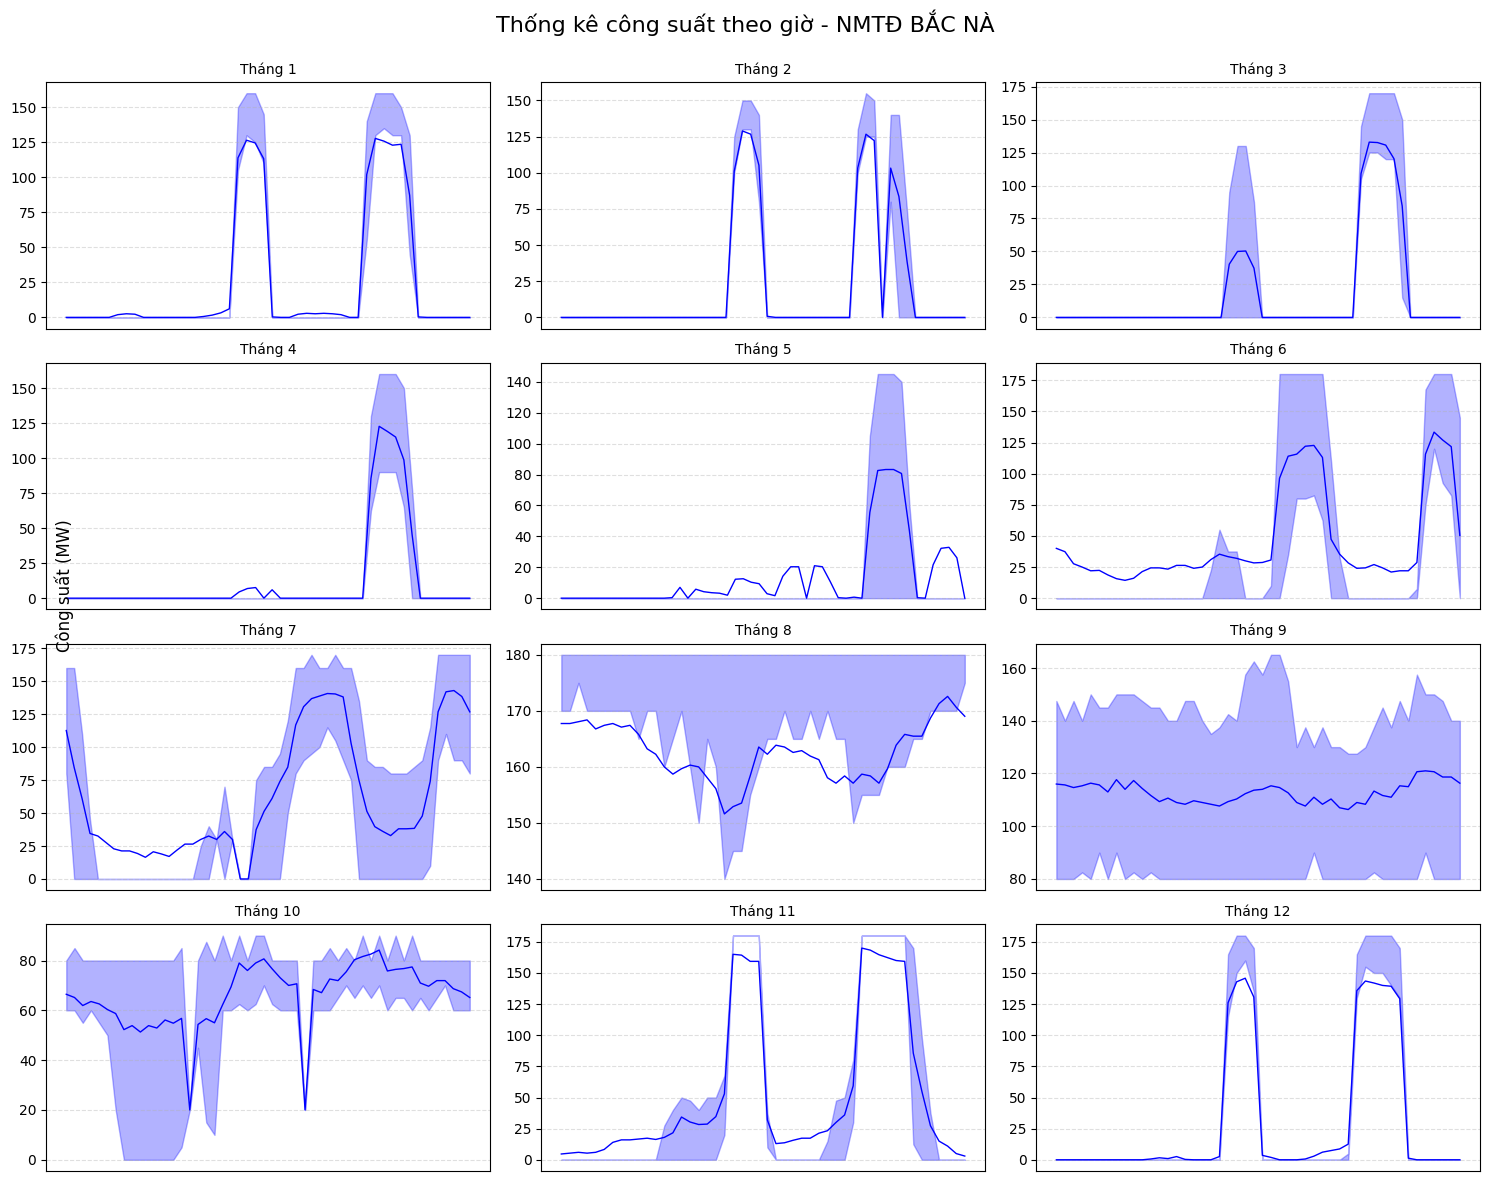

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")
def plot_power_statistics(plant_name, month, data_type):
    """
    Plot power statistics for a specific hydroelectric plant and month.
    
    Parameters:
    -----------
    plant_name : str
        Name of the hydroelectric plant
    month : int
        Month number (1-12)
    data_type : str, optional
        Type of data to plot: 'CS' for power or 'SL' for production (default: 'CS')
    """
    # Validate data_type parameter
    if data_type not in ['CS', 'SL']:
        raise ValueError("data_type must be either 'CS' or 'SL'")
    
    # Filter data for the specified plant
    df_plant = df[df['NMTD']==plant_name]
    
    # Convert datetime and filter by month
    df_plant['ENDTIME'] = pd.to_datetime(df_plant['ENDTIME'], format='%Y-%m-%d %H:%M:%S')
    df_month = df_plant[df_plant['ENDTIME'].dt.month == month]
    
    # Select relevant columns and rename for clarity
    df_month = df_month[['ENDTIME', 'CS', 'SL_PGIAOTONG']]
    df_month = df_month.rename(columns={'ENDTIME': 'Time', 'SL_PGIAOTONG': 'SL'})
    
    # Extract hour and minute from Time column
    df_month['hour'] = df_month['Time'].dt.hour
    df_month['minute'] = df_month['Time'].dt.minute
    
    # Group by hour and minute, calculate statistics
    df_grouped = df_month.groupby(['hour', 'minute']).agg({
        'CS': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
        'SL': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
    }).reset_index()
    
    # Rename columns for better readability
    df_grouped.columns = ['hour', 'minute', 
                         'CS_min', 'CS_max', 'CS_mean', 'CS_25p', 'CS_75p',
                         'SL_min', 'SL_max', 'SL_mean', 'SL_25p', 'SL_75p']
    
    # Create time indices for x-axis
    time_indices = [f"{hour:02d}:{minute:02d}" for hour, minute in zip(df_grouped['hour'], df_grouped['minute'])]
    
    # Set color based on data type
    color = 'blue' if data_type == 'CS' else 'green'
    light_color = 'lightblue' if data_type == 'CS' else 'lightgreen'
    
    # Set up the figure and axis
    plt.figure(figsize=(15, 8))
    
    # Fill between min and max with very light color
    plt.fill_between(time_indices, df_grouped[f'{data_type}_min'], df_grouped[f'{data_type}_max'], 
                    alpha=0.1, color=light_color, label='Khoảng Min-Max')
    
    # Fill between 25th and 75th percentiles with slightly darker color
    plt.fill_between(time_indices, df_grouped[f'{data_type}_25p'], df_grouped[f'{data_type}_75p'], 
                    alpha=0.3, color=color, label='Khoảng 25%-75%')
    
    # Plot min and max as dotted lines
    plt.plot(time_indices, df_grouped[f'{data_type}_min'], f'{color[0]}:', linewidth=1, label=f'{data_type} Min')
    plt.plot(time_indices, df_grouped[f'{data_type}_max'], f'{color[0]}:', linewidth=1, label=f'{data_type} Max')
    
    # Plot 25th and 75th percentiles as dashed lines
    plt.plot(time_indices, df_grouped[f'{data_type}_25p'], f'{color[0]}--', linewidth=1, label=f'{data_type} 25%')
    plt.plot(time_indices, df_grouped[f'{data_type}_75p'], f'{color[0]}--', linewidth=1, label=f'{data_type} 75%')
    
    # Plot the mean value as solid line
    plt.plot(time_indices, df_grouped[f'{data_type}_mean'], f'{color[0]}-', linewidth=2, label=f'{data_type} Trung bình')
    
    # Customize the plot
    month_name = ['', 'Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 
                 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'][month]
    
    # Set appropriate title and y-axis label based on data type
    title_prefix = 'Thống kê công suất' if data_type == 'CS' else 'Thống kê sản lượng'
    y_label = 'Công suất (MW)' if data_type == 'CS' else 'Sản lượng'
    
    plt.title(f'{title_prefix} theo giờ - {plant_name} - {month_name}', fontsize=16)
    plt.xlabel('Thời gian', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=8)
    
    # Show only some x-tick labels to prevent overcrowding
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(24))
    
    plt.tight_layout()
    plt.show()
    
    return df_grouped


# Plot data for all 12 months for both CS and SL
def plot_all_months(plant_name, data_type):
    """
    Plot data for all 12 months for a given plant and data type.
    
    Parameters:
    -----------
    plant_name : str
        Name of the hydroelectric plant
    data_type : str, optional
        Type of data to plot: 'CS' or 'SL' (default: 'CS')
    """
    plt.figure(figsize=(15, 12))
    
    for month in range(1, 13):
        plt.subplot(4, 3, month)
        try:
            # Filter data for the specified plant
            df_plant = df[df['NMTD']==plant_name]
            
            # Convert datetime and filter by month
            df_plant['ENDTIME'] = pd.to_datetime(df_plant['ENDTIME'], format='%Y-%m-%d %H:%M:%S')
            df_month = df_plant[df_plant['ENDTIME'].dt.month == month]
            
            if len(df_month) > 0:
                # Select relevant columns and rename for clarity
                df_month = df_month[['ENDTIME', 'CS', 'SL_PGIAOTONG']]
                df_month = df_month.rename(columns={'ENDTIME': 'Time', 'SL_PGIAOTONG': 'SL'})
                
                # Extract hour and minute from Time column
                df_month['hour'] = df_month['Time'].dt.hour
                df_month['minute'] = df_month['Time'].dt.minute
                
                # Group by hour and minute, calculate statistics
                df_grouped = df_month.groupby(['hour', 'minute']).agg({
                    'CS': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
                    'SL': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
                }).reset_index()
                
                # Rename columns for better readability
                df_grouped.columns = ['hour', 'minute', 
                                     'CS_min', 'CS_max', 'CS_mean', 'CS_25p', 'CS_75p',
                                     'SL_min', 'SL_max', 'SL_mean', 'SL_25p', 'SL_75p']
                
                # Create time indices for x-axis
                time_indices = [f"{hour:02d}:{minute:02d}" for hour, minute in zip(df_grouped['hour'], df_grouped['minute'])]
                
                # Set color based on data type
                color = 'blue' if data_type == 'CS' else 'green'
                light_color = 'lightblue' if data_type == 'CS' else 'lightgreen'
                
                # Plot mean with solid line
                plt.plot(time_indices, df_grouped[f'{data_type}_mean'], f'{color[0]}-', linewidth=1)
                
                # Fill between 25th and 75th percentiles
                plt.fill_between(time_indices, df_grouped[f'{data_type}_25p'], df_grouped[f'{data_type}_75p'], 
                                alpha=0.3, color=color)
                
                month_name = ['', 'Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 
                             'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'][month]
                plt.title(f'{month_name}', fontsize=10)
                
                # Customize the subplot
                plt.xticks([])  # Hide x-ticks for better appearance
                plt.grid(True, linestyle='--', alpha=0.4)
            else:
                plt.text(0.5, 0.5, f'Không có dữ liệu tháng {month}', 
                         horizontalalignment='center', verticalalignment='center')
        
        except Exception as e:
            plt.text(0.5, 0.5, f'Lỗi: {str(e)}', 
                     horizontalalignment='center', verticalalignment='center')
    
    # Add a common title for all subplots
    data_type_name = 'công suất' if data_type == 'CS' else 'sản lượng'
    plt.suptitle(f'Thống kê {data_type_name} theo giờ - {plant_name}', fontsize=16)
    
    # Add a common y-axis label
    fig = plt.gcf()
    fig.text(0.04, 0.5, 'Công suất (MW)' if data_type == 'CS' else 'Sản lượng', 
             va='center', rotation='vertical', fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()
    
# Plot for all months
plot_all_months('NMTĐ BẮC NÀ', 'CS')

In [6]:
df_1 = df[df['NMTD']=='NMTĐ BẮC NÀ 1']
df_1

,CTDL,NMTD,MADIEMDO,TENDIEMDO,SOCONGTO,STARTTIME,ENDTIME,CS,SL_PGIAOTONG,NAM
2541104,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 00:00:00,2023-01-01 00:30:00,0.0,0.0,2023
2541105,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 00:30:00,2023-01-01 01:00:00,0.0,0.0,2023
2541106,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 01:00:00,2023-01-01 01:30:00,0.0,0.0,2023
2541107,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 01:30:00,2023-01-01 02:00:00,0.0,0.0,2023
2541108,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 02:00:00,2023-01-01 02:30:00,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...
2558620,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-12-31 22:00:00,2023-12-31 22:30:00,0.0,0.0,2023
2558621,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-12-31 22:30:00,2023-12-31 23:00:00,0.0,0.0,2023
2558622,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-12-31 23:00:00,2023-12-31 23:30:00,0.0,0.0,2023
2558623,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-12-31 23:30:00,2024-01-01 00:00:00,0.0,0.0,2023


In [8]:
df_1['ENDTIME'] = pd.to_datetime(df_1['ENDTIME'], format='%Y-%m-%d %H:%M:%S')
df_T1 = df_1[df_1['ENDTIME'].dt.month == 1]
df_T1

C:\Users\nltt03\AppData\Local\Temp\ipykernel_11916\621564113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ENDTIME'] = pd.to_datetime(df_1['ENDTIME'], format='%Y-%m-%d %H:%M:%S')


,CTDL,NMTD,MADIEMDO,TENDIEMDO,SOCONGTO,STARTTIME,ENDTIME,CS,SL_PGIAOTONG,NAM
2541104,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 00:00:00,2023-01-01 00:30:00,0.0,0.0,2023
2541105,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 00:30:00,2023-01-01 01:00:00,0.0,0.0,2023
2541106,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 01:00:00,2023-01-01 01:30:00,0.0,0.0,2023
2541107,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 01:30:00,2023-01-01 02:00:00,0.0,0.0,2023
2541108,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-01 02:00:00,2023-01-01 02:30:00,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...
2542588,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-31 22:00:00,2023-01-31 22:30:00,0.0,0.0,2023
2542589,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-31 22:30:00,2023-01-31 23:00:00,0.0,0.0,2023
2542590,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-01-31 23:00:00,2023-01-31 23:30:00,0.0,0.0,2023
2558623,CTY ĐIỆN LỰC LÀO CAI,NMTĐ BẮC NÀ 1,G2A193S000M371,BẮC NÀ 1 CHÍNH 371,18001418,2023-12-31 23:30:00,2024-01-01 00:00:00,0.0,0.0,2023


In [10]:
df_T1 = df_T1[['ENDTIME', 'CS','SL_PGIAOTONG']]
df_T1 = df_T1.rename(columns={'ENDTIME': 'Time','SL_PGIAOTONG': 'SL'})

In [11]:
df_T1

,Time,CS,SL
2541104,2023-01-01 00:30:00,0.0,0.0
2541105,2023-01-01 01:00:00,0.0,0.0
2541106,2023-01-01 01:30:00,0.0,0.0
2541107,2023-01-01 02:00:00,0.0,0.0
2541108,2023-01-01 02:30:00,0.0,0.0
...,...,...,...
2542588,2023-01-31 22:30:00,0.0,0.0
2542589,2023-01-31 23:00:00,0.0,0.0
2542590,2023-01-31 23:30:00,0.0,0.0
2558623,2024-01-01 00:00:00,0.0,0.0


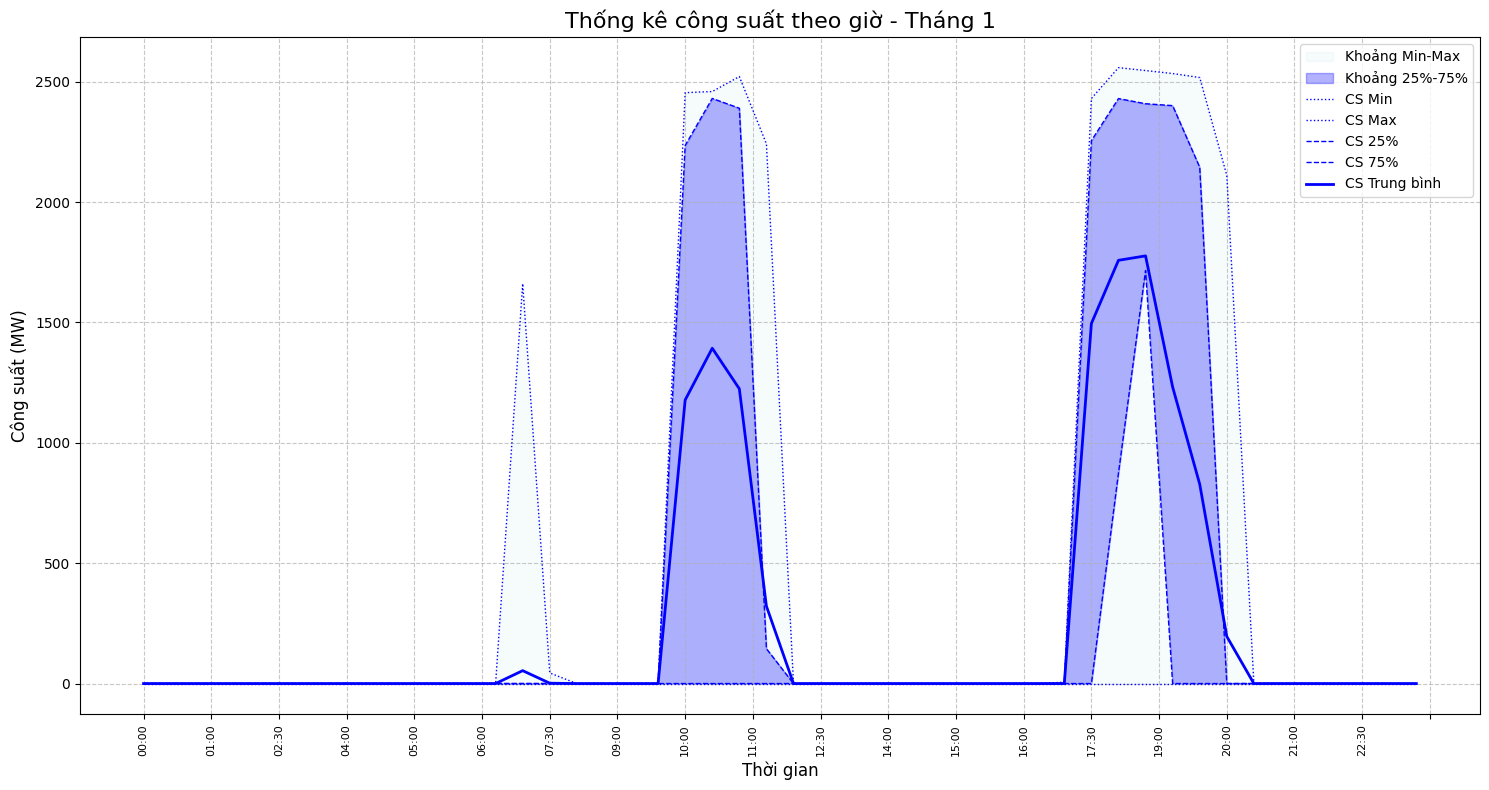

In [16]:
import numpy as np
import seaborn as sns

# Extract hour and minute from Time column
df_T1['hour'] = df_T1['Time'].dt.hour
df_T1['minute'] = df_T1['Time'].dt.minute

# Group by hour and minute, calculate multiple statistics for both CS and SL
df_T1_group = df_T1.groupby(['hour', 'minute']).agg({
    'CS': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'SL': ['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
}).reset_index()

# Rename the columns for better readability
df_T1_group.columns = ['hour', 'minute', 
                      'CS_min', 'CS_max', 'CS_mean', 'CS_25p', 'CS_75p',
                      'SL_min', 'SL_max', 'SL_mean', 'SL_25p', 'SL_75p']
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Create time indices for x-axis
time_indices = [f"{hour:02d}:{minute:02d}" for hour, minute in zip(df_T1_group['hour'], df_T1_group['minute'])]

# Set up the figure and axis
plt.figure(figsize=(15, 8))

# Fill between min and max with very light color
plt.fill_between(time_indices, df_T1_group['CS_min'], df_T1_group['CS_max'], 
                alpha=0.1, color='lightblue', label='Khoảng Min-Max')

# Fill between 25th and 75th percentiles with slightly darker color
plt.fill_between(time_indices, df_T1_group['CS_25p'], df_T1_group['CS_75p'], 
                alpha=0.3, color='blue', label='Khoảng 25%-75%')

# Plot min and max as dotted lines
plt.plot(time_indices, df_T1_group['CS_min'], 'b:', linewidth=1, label='CS Min')
plt.plot(time_indices, df_T1_group['CS_max'], 'b:', linewidth=1, label='CS Max')

# Plot 25th and 75th percentiles as dashed lines
plt.plot(time_indices, df_T1_group['CS_25p'], 'b--', linewidth=1, label='CS 25%')
plt.plot(time_indices, df_T1_group['CS_75p'], 'b--', linewidth=1, label='CS 75%')

# Plot the mean CS value as solid line
plt.plot(time_indices, df_T1_group['CS_mean'], 'b-', linewidth=2, label='CS Trung bình')

# Customize the plot
plt.title('Thống kê công suất theo giờ - Tháng 1', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Công suất (MW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=8)

# Show only some x-tick labels to prevent overcrowding
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(24))

plt.tight_layout()
plt.show()

In [13]:
df_T1_group

,hour,minute,CS_min,CS_max,CS_mean,CS_25p,CS_75p,SL_min,SL_max,SL_mean,SL_25p,SL_75p
0,0,0,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,0,30,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,1,30,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,2,0,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
5,2,30,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
6,3,0,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
7,3,30,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
8,4,0,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
9,4,30,0.0,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
